In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = pd.read_csv(os.getenv('X_ALL'), index_col=0)
y = pd.read_csv(os.getenv('Y_ALL'), index_col=0)

# fill NaN with 0
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X

,episode_id,10-Year-Old Homer,ARTIE,Agnes Skinner,Akira,Alec Baldwin,Alex,All,Amber Dempsey,Annie Crawford,...,Woman,Women,Workers,Zack,number_in_season,number_in_series,original_air_year,season,us_viewers_in_millions,views
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12,12,1990,1,30.40,62561.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,14,1990,2,33.60,59575.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,17,1990,2,26.10,64959.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6,19,1990,2,25.40,50691.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,21,1990,2,26.20,57605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14,500,2012,23,5.77,45226.0
596,596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16,502,2012,23,4.97,44818.0
597,597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,511,2012,24,5.65,39687.0
598,598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12,542,2014,25,2.69,39292.0


In [2]:
# train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)

Since data is greatly sparse and high-dimensional, we will use a linear model and perform several dimension reduction methods

<Axes: >

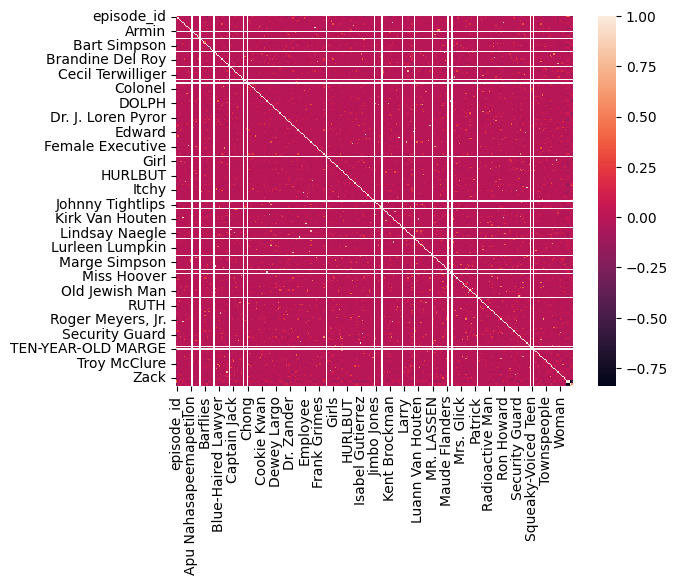

In [3]:
# correlation matrix
X_train.corr()
sns.heatmap(X_train.corr())

In [4]:
# data Scaling
x_scaled = StandardScaler().fit_transform(X)

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=3)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

pca_features

array([[ 6.75043359,  1.05054887, -0.6539647 ],
       [ 4.07178343,  4.24684873, -1.20293993],
       [ 2.99312164,  2.20805366,  0.19224756],
       ...,
       [-2.88133617, -1.11891454,  0.05073574],
       [-3.27224031, -1.22086201,  0.0937639 ],
       [-2.9962385 , -1.15435768,  0.13370712]])

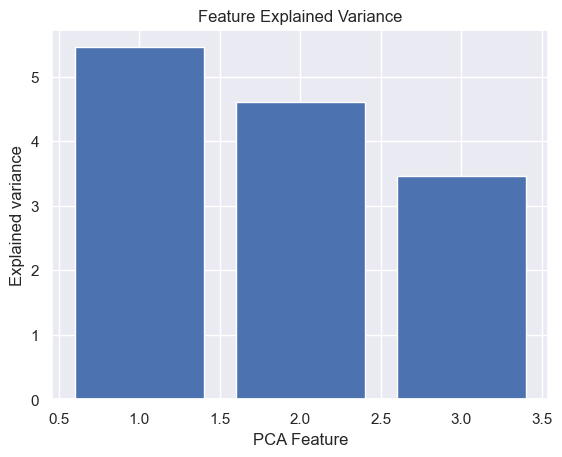

In [5]:
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

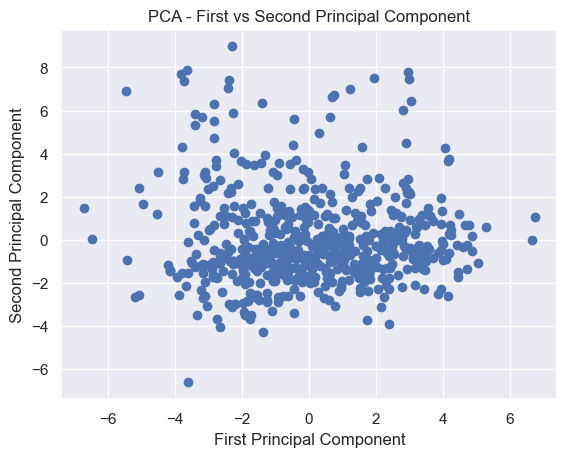

In [6]:
# scatter plot of the first two principal components
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First vs Second Principal Component')
plt.show()